In [31]:
import torch

import matplotlib.pyplot as plt
import pickle as pkl

import os
import random

from PIL import Image
from torchvision.datasets import MNIST

In [2]:
plt.rcParams['image.cmap'] = 'Blues_r'

## Preprocess MNIST

Save MNIST to disk split by digit value.

In [3]:
MNIST_data = MNIST(root='./data', train=True, download=True, transform=None)

In [24]:
# create directory to save separated data
if not os.path.exists('./data/MNIST_sep'):
    os.makedirs('./data/MNIST_sep')
    
# save each image in labeled directory
num_per_class = [0 for _ in range(10)]
for image, y in MNIST_data:
    save_dir = f'./data/MNIST_sep/{y}'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    x = np.asarray(image) / 256
    with open(f'{save_dir}/{num_per_class[y]}.pkl', 'wb+') as f:
        pkl.dump(x, f)    
    num_per_class[y] += 1

with open(f'./data/MNIST_sep/num_per_class.pkl', 'wb+') as f:
    pkl.dump(num_per_class, f)

In [22]:
# delete separated data
# import shutil
# shutil.rmtree('./data/MNIST_sep')

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


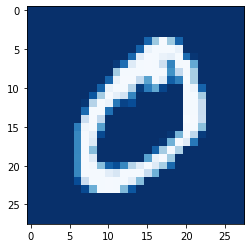

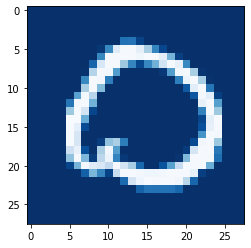

In [30]:
# show saved data is correct
with open('./data/MNIST_sep/0/0.pkl', 'rb') as f:
    x1 = pkl.load(f)
with open('./data/MNIST_sep/0/100.pkl', 'rb') as f:
    x2 = pkl.load(f)
    
with open('./data/MNIST_sep/num_per_class.pkl', 'rb') as f:
    npc = pkl.load(f)
    
print(npc)
plt.imshow(x1)
plt.show()
plt.imshow(x2)
plt.show()

## Save to YOLO Format

In [158]:
num_samples = 100
YOLO_data_dir = './data/YOLO_data'
MAX_AMOUNT = 9999

# create directory to save YOLO data
if not os.path.exists(YOLO_data_dir):
    os.makedirs(YOLO_data_dir)

In [159]:
def save_YOLO_format(image, annotations, save_name):
    """
    image: image
    annotations: array of bboxes [(class, x_coord, y_coord, width, height), ...]
        - normalized to scale of image (coords and lengths in [0, 1])
        - values in bboxes must be strings
    save_name: image and annotations will be saved as f'{save_name}.png' and f'{save_name}_annotations.txt'
    """
    
    image.save(f'{YOLO_data_dir}/{save_name}.png', 'png')
    
    with open(f'{YOLO_data_dir}/{save_name}_annotations.txt', 'w+') as f:
        for annotation in annotations:
            f.write(' '.join(annotation) + '\n')

In [160]:
def create_YOLO_sample(sample):
    """
    sample: string of digits to create the sample
        - ex. 194
    returns numpy image and list of annotations
    """
    images = []
    annotations = []
    for idx, digit in enumerate(sample):
        image_to_stitch_idx = random.randint(0, num_per_class[int(digit)] - 1)
        with open(f'./data/MNIST_sep/{digit}/{image_to_stitch_idx}.pkl', 'rb') as f:
            image_to_stitch = pkl.load(f)
        images.append(image_to_stitch)
        
        digit_class = digit
        x_coord = str((idx + 0.5) / len(sample))
        y_coord = str(0.5)
        width = str(1 / len(sample))
        height = str(1)
        
        annotations.append((digit_class, x_coord, y_coord, width, height))
    
    image_np = np.concatenate(images, axis=1)
    image = Image.fromarray(256 * image_np).convert('L')
    
    return image, annotations

In [161]:
# generate and save YOLO data and annotations
for sample_num in range(num_samples):
    sample = str(random.randint(1, MAX_AMOUNT))
    image, annotations = create_YOLO_sample(sample)
    save_YOLO_format(image, annotations, str(sample_num))

In [162]:
# delete YOLO data
# import shutil
# shutil.rmtree(YOLO_data_dir)

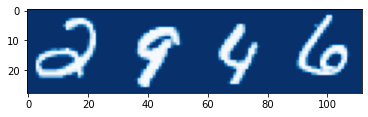

2 0.125 0.5 0.25 1
9 0.375 0.5 0.25 1
4 0.625 0.5 0.25 1
6 0.875 0.5 0.25 1



In [164]:
# show it worked
image = Image.open(f'{YOLO_data_dir}/1.png')
plt.imshow(image)
plt.show()

with open(f'{YOLO_data_dir}/1_annotations.txt', 'r') as f:
    print(f.read())